<a href="https://colab.research.google.com/github/tajski/Keras-konwulsyjne-sieci-neuronowe/blob/main/Cwiczenie2_42885.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W pierwszej kolejności zaczynamy oczywiście od importu potrzebnych bibliotek oraz przy użyciu modułu drive z biblioteki google.colab do zamontowania Dysku Google do naszego Colaba.

In [1]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
from matplotlib import pyplot as plt
from keras.utils import image_dataset_from_directory
from keras import layers, Model
from keras.models import Sequential
from keras.utils import plot_model
from keras.metrics import CategoricalAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Accuracy

In [2]:
drive.mount('/content/drive', force_remount=True)
!unzip -q "/content/drive/MyDrive/Colab Notebooks/zwierzetas.zip"

Mounted at /content/drive


Następnie następuje podział zbioru danych na dwa podzbiory: testowy oraz treningowy.

In [3]:
train_data_root = "zwierzetas/train"
test_data_root = "zwierzetas/test"

train_data = {}
test_data = {}

# Przechodzenie przez katalogi treningowe
for root, dirs, files in os.walk(train_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        train_data[dir] = os.listdir(dir_path)

print("Dane treningowe:")
for x in train_data:
    print(x, len(train_data[x]))

# Przechodzenie przez katalogi testowe
for root, dirs, files in os.walk(test_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        test_data[dir] = os.listdir(dir_path)

print()

print("Dane testowe:")
for x in test_data:
    print(x, len(test_data[x]))

Dane treningowe:
kot 300
krowa 300
pająk 300
koń 300
pies 300
motyl 300
kurczak 300
owca 300
słoń 300
wiewiórka 300

Dane testowe:
kot 100
krowa 100
pająk 100
koń 100
pies 100
motyl 100
kurczak 100
owca 100
słoń 100
wiewiórka 100


W kolejnym kroku każdy z obrazów jest skalowany do rozmiaru 256x256 oraz kategoryzowany na podstawie etykiety.

In [4]:
train_dataset, valid_dataset = image_dataset_from_directory(train_data_root, validation_split=0.2,
                                       subset='both',
                                       seed=1410,
                                       image_size=(256, 256),
                                       label_mode='categorical',
                                      color_mode="rgb"
                                       )

test_dataset = image_dataset_from_directory(test_data_root, seed=1410,
                                       image_size=(256, 256),
                                       label_mode='categorical',
                                      color_mode="rgb"
                                       )

Found 3000 files belonging to 10 classes.
Using 2400 files for training.
Using 600 files for validation.
Found 1000 files belonging to 10 classes.


Tworzymy podgląd pierwszych 16 wygenerowanych obrazów z etykietami:

['koń', 'kot', 'krowa', 'kurczak', 'motyl', 'owca', 'pająk', 'pies', 'słoń', 'wiewiórka']


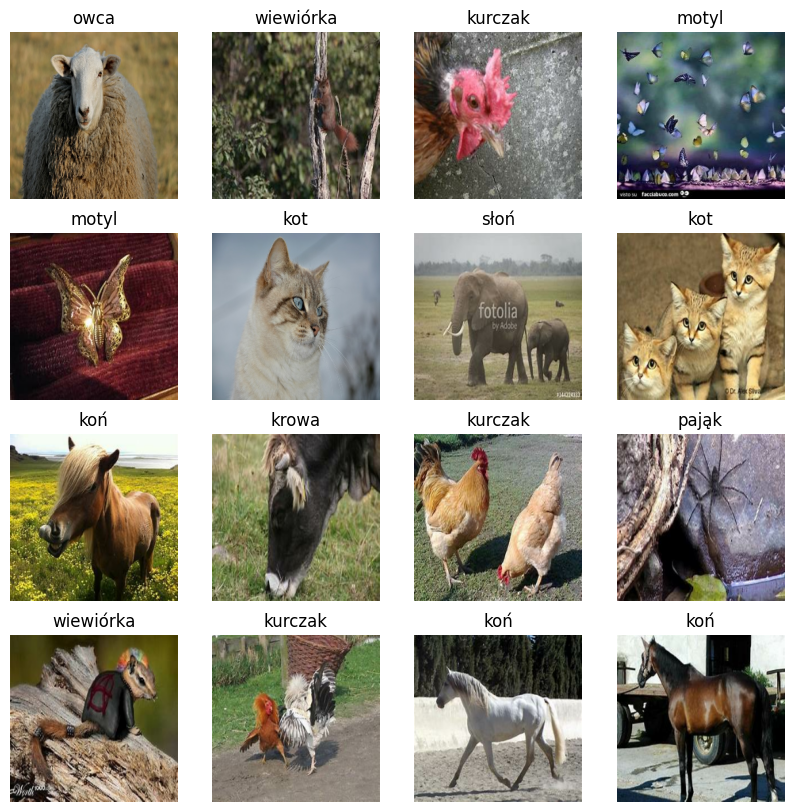

In [5]:
class_names = train_dataset.class_names
print(class_names)

%matplotlib inline
fig, ax = plt.subplots(4,4, figsize=(10,10))


for images, labels in train_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(np.argmax(labels[i]))])
        plt.axis("off")

# **Budowanie, nauka i testowanie sieci**

W tej sekcji budowane są modele sieci zbudowane porównawczo z poprzednikami poprzez użycie różnych typów warstw oraz ich argumentów, takich jak:
warstwy konwolucyjne, warstwy normalizacji wsadowej, warstwy max pooling, warstwę spłaszczającą czy warstwy gęste.

W modelu pierwszym użyte są warstwy konwulcyjne

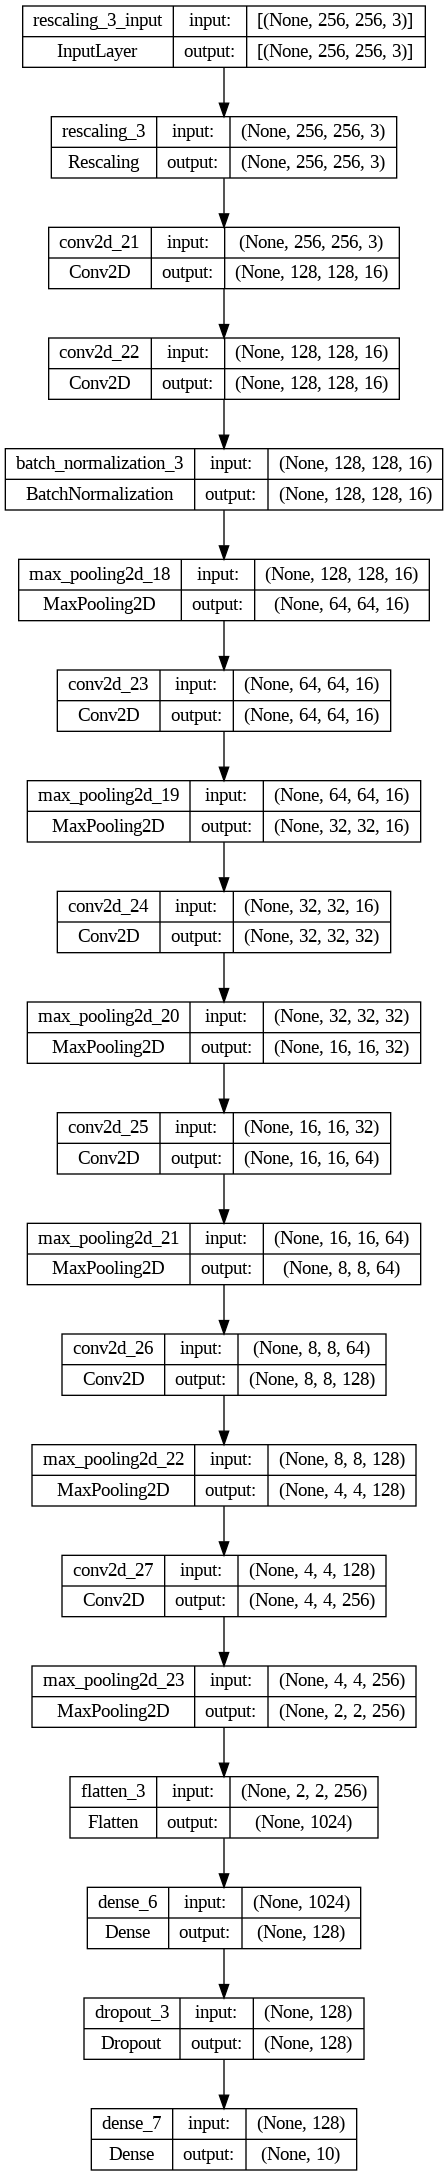

In [10]:
model1 = Sequential([
    layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
    layers.Conv2D(16, 10, strides=2, padding='same', activation="relu"),
    layers.Conv2D(16, 8, padding='same', activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Conv2D(16, 7, padding='same', activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, 7, padding='same', activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 5, padding='same', activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 5, padding='same', activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(256, 3, padding='same', activation="relu"),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
    ])

plot_model(model1, show_shapes=True)

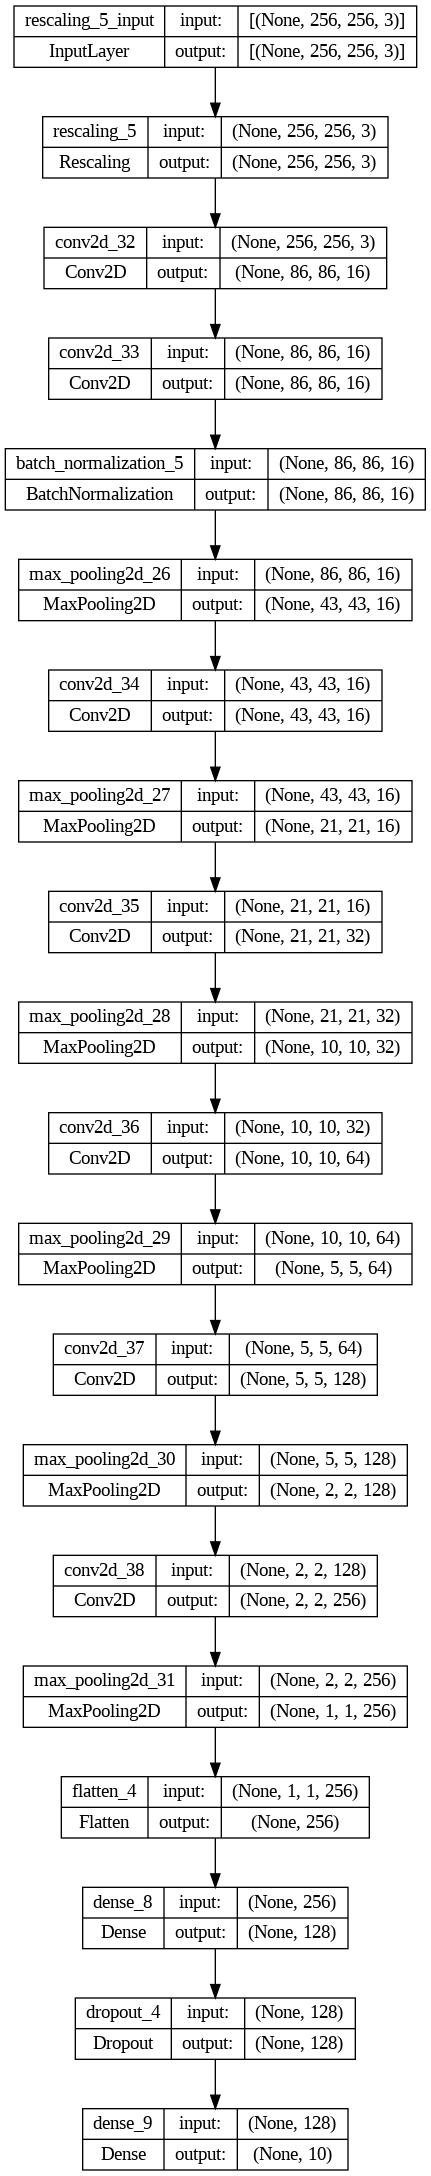

In [14]:
model2 = Sequential([
    layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
    layers.Conv2D(16, (10,10), strides=3, padding='same', activation="relu"),
    layers.Conv2D(16, (8,8), strides=1, padding='same', activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Conv2D(16, (7,7), padding='same', activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, (7,7), padding='same', activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, (5,5), padding='same', activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, (5,5), padding='same', activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(256, (3,3), padding='same', activation="relu"),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
    ])

plot_model(model2, show_shapes=True)

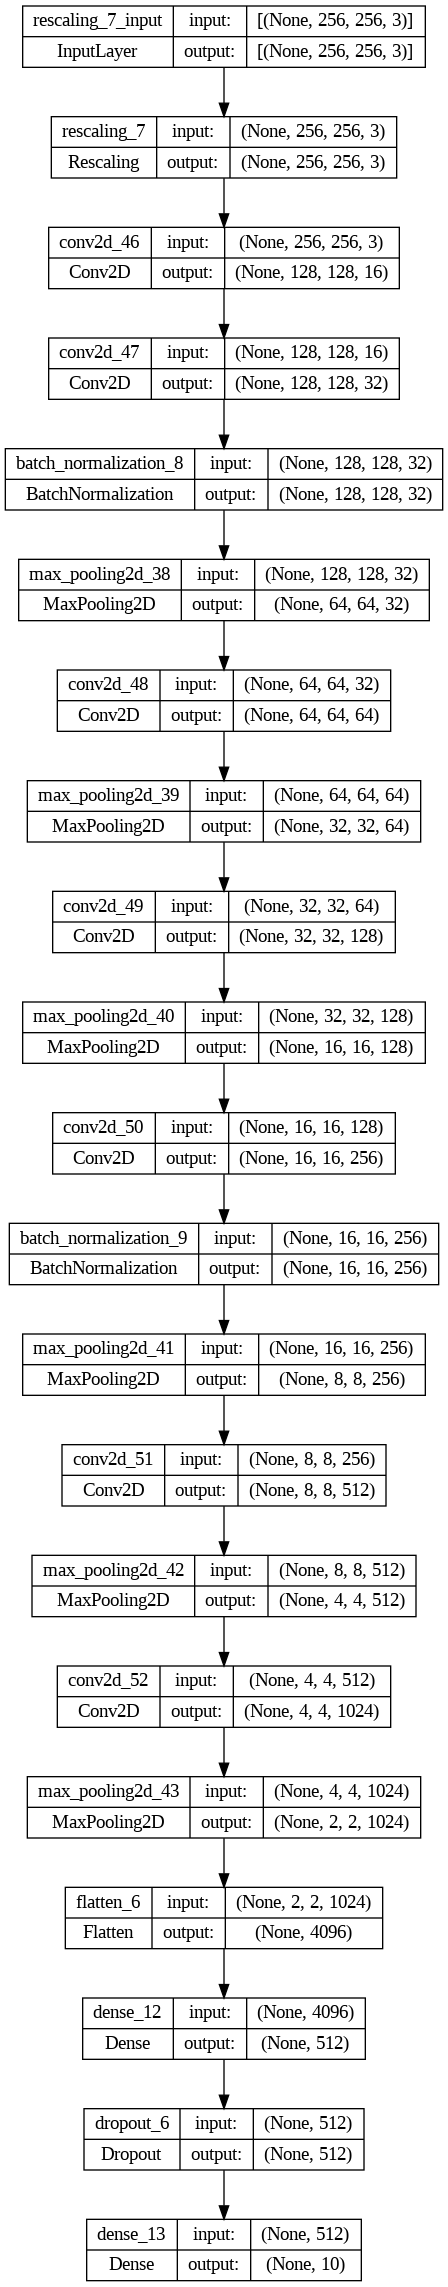

In [20]:
model3 = Sequential([
  layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, (2,2), strides=2, padding='same', activation="relu"),
  layers.Conv2D(32, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(64, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(128, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(256, (3,3), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(512, (3,3), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(1024, (3,3), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(512, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(10, activation="softmax")
])
plot_model(model3, show_shapes=True)

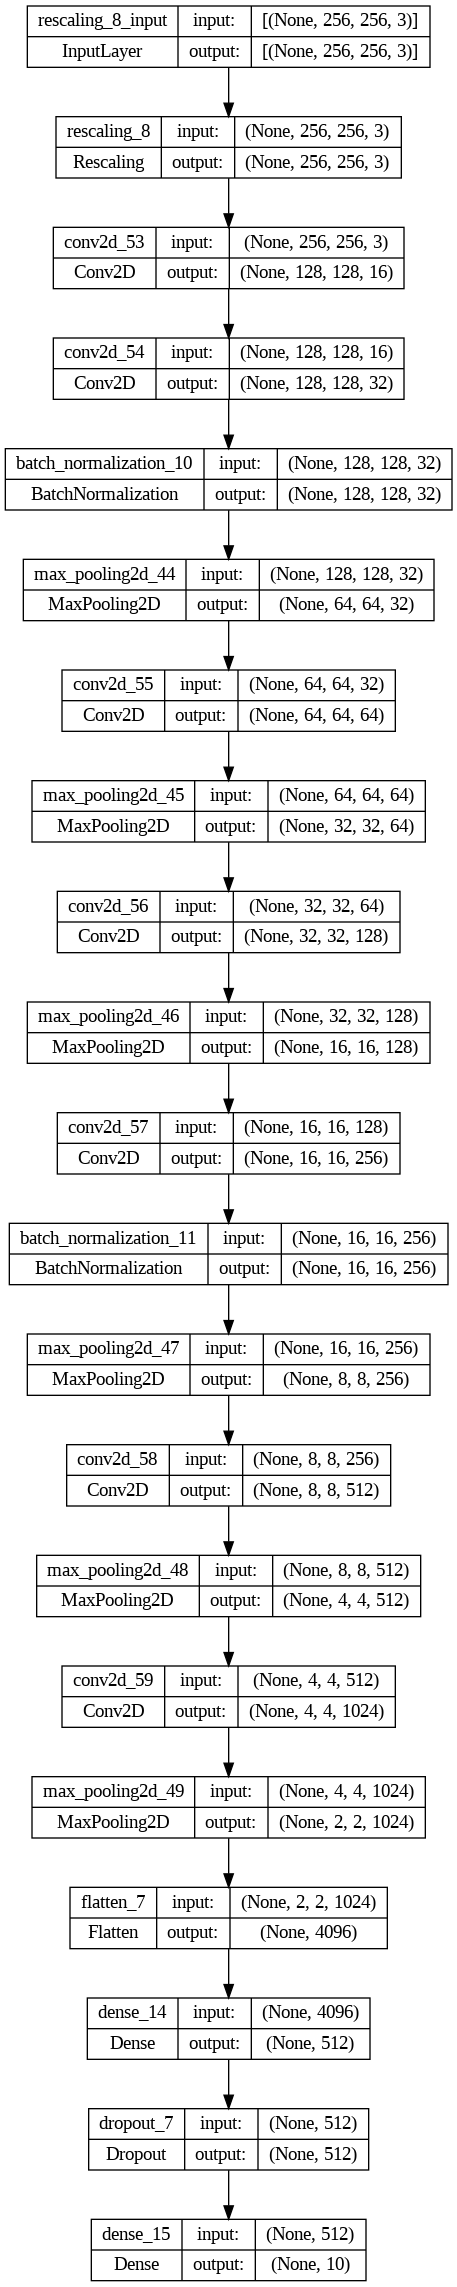

In [23]:
model4 = Sequential([
  layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, (2,2), strides=2, padding='same', activation="relu"),
  layers.Conv2D(32, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(64, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(128, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(256, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(512, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(1024, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(512, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(10, activation="softmax")
])
plot_model(model4, show_shapes=True)

In [11]:
# Kompilacja
model1.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
history1 = model1.fit(train_dataset, epochs=30, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/30
75/75 [==============================] - 17s 85ms/step - loss: 2.3119 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 2/30
75/75 [==============================] - 7s 93ms/step - loss: 2.3029 - accuracy: 0.1083 - val_loss: 2.3010 - val_accuracy: 0.1117
Epoch 3/30
75/75 [==============================] - 6s 72ms/step - loss: 2.2966 - accuracy: 0.1129 - val_loss: 2.2794 - val_accuracy: 0.1467
Epoch 4/30
75/75 [==============================] - 7s 89ms/step - loss: 2.2588 - accuracy: 0.1450 - val_loss: 2.3575 - val_accuracy: 0.1200
Epoch 5/30
75/75 [==============================] - 6s 75ms/step - loss: 2.2352 - accuracy: 0.1508 - val_loss: 2.1785 - val_accuracy: 0.1850
Epoch 6/30
75/75 [==============================] - 7s 87ms/step - loss: 2.1863 - accuracy: 0.1787 - val_loss: 2.2645 - val_accuracy: 0.1267
Epoch 7/30
75/75 [==============================] - 6s 76ms/step - loss: 2.1643 - accuracy: 0.1846 - val_loss: 2.1802 - val_accuracy: 0.1883
Epoch 8/30
7

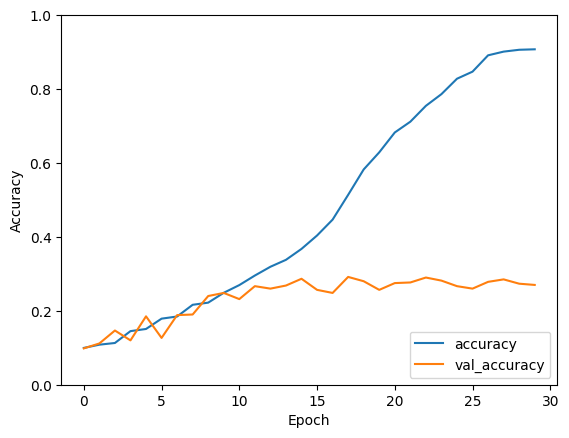

In [12]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [15]:
# Kompilacja
model2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
history2 = model2.fit(train_dataset, epochs=30, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/30
75/75 [==============================] - 11s 85ms/step - loss: 2.3058 - accuracy: 0.1000 - val_loss: 2.2984 - val_accuracy: 0.1083
Epoch 2/30
75/75 [==============================] - 5s 62ms/step - loss: 2.2817 - accuracy: 0.1346 - val_loss: 2.3379 - val_accuracy: 0.0933
Epoch 3/30
75/75 [==============================] - 6s 72ms/step - loss: 2.2741 - accuracy: 0.1312 - val_loss: 2.2620 - val_accuracy: 0.1350
Epoch 4/30
75/75 [==============================] - 6s 74ms/step - loss: 2.2300 - accuracy: 0.1713 - val_loss: 2.2187 - val_accuracy: 0.2250
Epoch 5/30
75/75 [==============================] - 5s 62ms/step - loss: 2.1916 - accuracy: 0.1808 - val_loss: 2.2511 - val_accuracy: 0.1300
Epoch 6/30
75/75 [==============================] - 7s 85ms/step - loss: 2.1203 - accuracy: 0.2096 - val_loss: 2.1462 - val_accuracy: 0.2250
Epoch 7/30
75/75 [==============================] - 6s 73ms/step - loss: 2.0803 - accuracy: 0.2350 - val_loss: 2.1188 - val_accuracy: 0.2250
Epoch 8/30
7

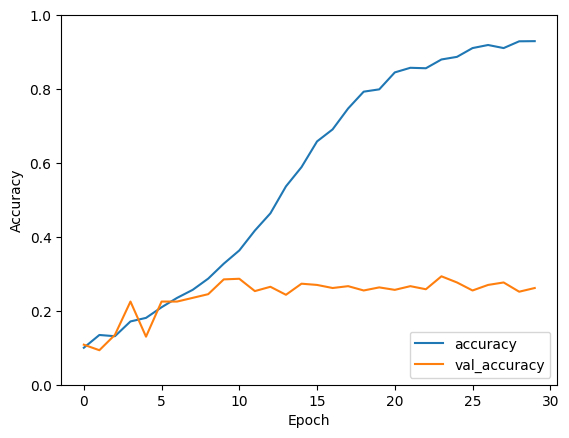

In [16]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [21]:
# Kompilacja
model3.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
history3 = model3.fit(train_dataset, epochs=40, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/40
75/75 [==============================] - 12s 81ms/step - loss: 2.6433 - accuracy: 0.1533 - val_loss: 2.3076 - val_accuracy: 0.1267
Epoch 2/40
75/75 [==============================] - 7s 85ms/step - loss: 2.0475 - accuracy: 0.2579 - val_loss: 3.1392 - val_accuracy: 0.1150
Epoch 3/40
75/75 [==============================] - 5s 70ms/step - loss: 1.8884 - accuracy: 0.3175 - val_loss: 2.9398 - val_accuracy: 0.0917
Epoch 4/40
75/75 [==============================] - 7s 87ms/step - loss: 1.7227 - accuracy: 0.3821 - val_loss: 3.5083 - val_accuracy: 0.1200
Epoch 5/40
75/75 [==============================] - 7s 92ms/step - loss: 1.5662 - accuracy: 0.4558 - val_loss: 3.7571 - val_accuracy: 0.1200
Epoch 6/40
75/75 [==============================] - 6s 75ms/step - loss: 1.3807 - accuracy: 0.5183 - val_loss: 2.3274 - val_accuracy: 0.2133
Epoch 7/40
75/75 [==============================] - 6s 76ms/step - loss: 1.2166 - accuracy: 0.5792 - val_loss: 2.0873 - val_accuracy: 0.2817
Epoch 8/40
7

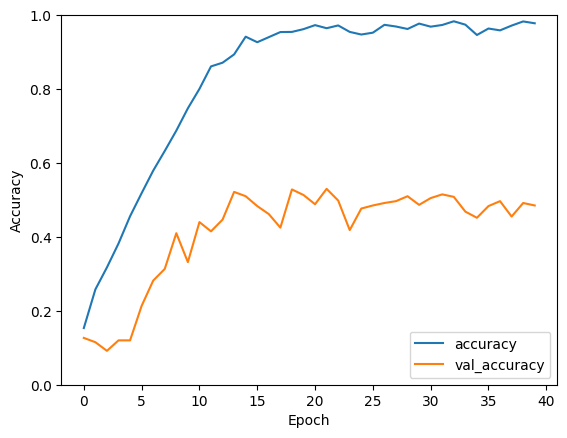

In [22]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [24]:
# Kompilacja
model4.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
history4 = model4.fit(train_dataset, epochs=40, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/40
75/75 [==============================] - 10s 74ms/step - loss: 2.5837 - accuracy: 0.1679 - val_loss: 2.2988 - val_accuracy: 0.1150
Epoch 2/40
75/75 [==============================] - 7s 89ms/step - loss: 2.0232 - accuracy: 0.2837 - val_loss: 2.3163 - val_accuracy: 0.1150
Epoch 3/40
75/75 [==============================] - 6s 71ms/step - loss: 1.8903 - accuracy: 0.3217 - val_loss: 2.4894 - val_accuracy: 0.1150
Epoch 4/40
75/75 [==============================] - 6s 79ms/step - loss: 1.7420 - accuracy: 0.3700 - val_loss: 2.6707 - val_accuracy: 0.1317
Epoch 5/40
75/75 [==============================] - 7s 96ms/step - loss: 1.6337 - accuracy: 0.4242 - val_loss: 2.6429 - val_accuracy: 0.1617
Epoch 6/40
75/75 [==============================] - 5s 69ms/step - loss: 1.4732 - accuracy: 0.4688 - val_loss: 2.5667 - val_accuracy: 0.2083
Epoch 7/40
75/75 [==============================] - 5s 69ms/step - loss: 1.3953 - accuracy: 0.5192 - val_loss: 2.0326 - val_accuracy: 0.2850
Epoch 8/40
7

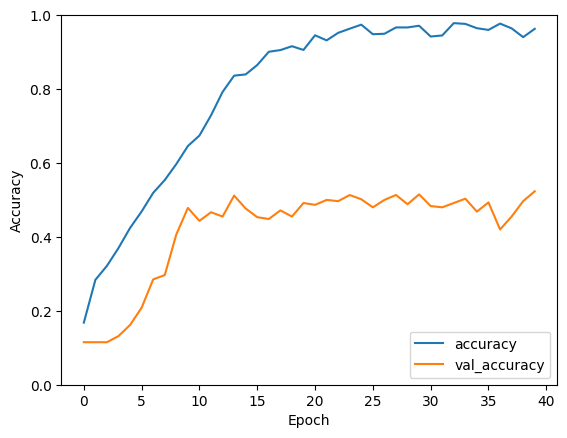

In [25]:
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [42]:
result1 = model1.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(result1["accuracy"]*100,2)}%')

32/32 [==============================] - 3s 71ms/step - loss: 5.0472 - accuracy: 0.2940
Dokładność modelu 29.4%


In [43]:
result2 = model2.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(result2["accuracy"]*100,2)}%')

32/32 [==============================] - 2s 40ms/step - loss: 6.0255 - accuracy: 0.2640
Dokładność modelu 26.4%


In [44]:
result3 = model3.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(result3["accuracy"]*100,2)}%')

32/32 [==============================] - 3s 65ms/step - loss: 3.4263 - accuracy: 0.5010
Dokładność modelu 50.1%


In [45]:
result4 = model4.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(result4["accuracy"]*100,2)}%')

32/32 [==============================] - 2s 42ms/step - loss: 3.1664 - accuracy: 0.5020
Dokładność modelu 50.2%


Batch 64 dla modelu 4

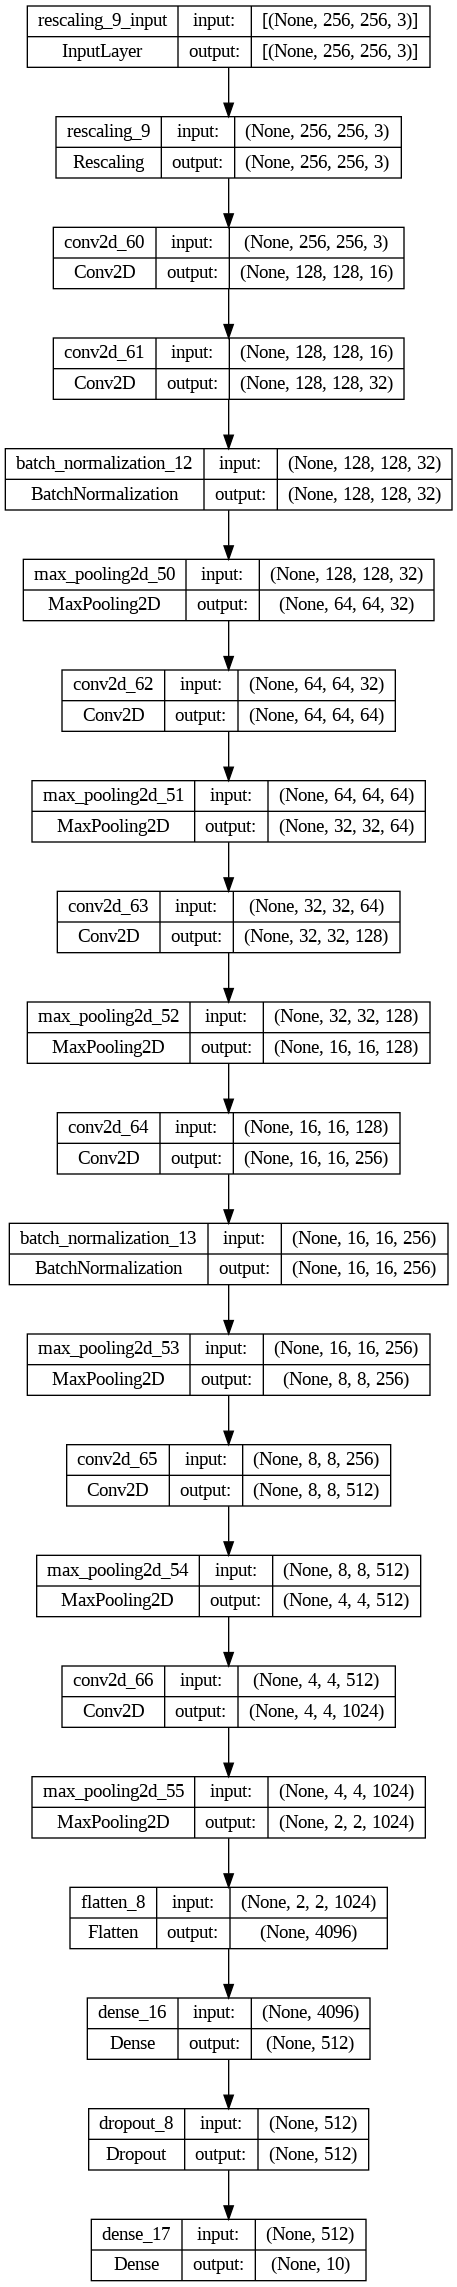

In [28]:
model4_64 = Sequential([
  layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, (2,2), strides=2, padding='same', activation="relu"),
  layers.Conv2D(32, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(64, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(128, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(256, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(512, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(1024, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(512, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(10, activation="softmax")
])
plot_model(model4_64, show_shapes=True)

In [29]:
# Kompilacja
model4_64.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
history4_64 = model4_64.fit(train_dataset, epochs=40, validation_data=valid_dataset,
                    batch_size=64)

Epoch 1/40
75/75 [==============================] - 10s 91ms/step - loss: 2.6063 - accuracy: 0.1754 - val_loss: 2.3240 - val_accuracy: 0.1150
Epoch 2/40
75/75 [==============================] - 6s 71ms/step - loss: 2.0541 - accuracy: 0.2679 - val_loss: 2.3991 - val_accuracy: 0.1317
Epoch 3/40
75/75 [==============================] - 6s 77ms/step - loss: 1.8984 - accuracy: 0.3171 - val_loss: 2.4236 - val_accuracy: 0.1133
Epoch 4/40
75/75 [==============================] - 5s 67ms/step - loss: 1.7667 - accuracy: 0.3596 - val_loss: 2.4731 - val_accuracy: 0.1500
Epoch 5/40
75/75 [==============================] - 7s 84ms/step - loss: 1.6626 - accuracy: 0.4221 - val_loss: 2.4514 - val_accuracy: 0.1783
Epoch 6/40
75/75 [==============================] - 5s 67ms/step - loss: 1.5199 - accuracy: 0.4758 - val_loss: 2.4218 - val_accuracy: 0.2183
Epoch 7/40
75/75 [==============================] - 6s 83ms/step - loss: 1.4046 - accuracy: 0.5096 - val_loss: 1.8179 - val_accuracy: 0.3617
Epoch 8/40
7

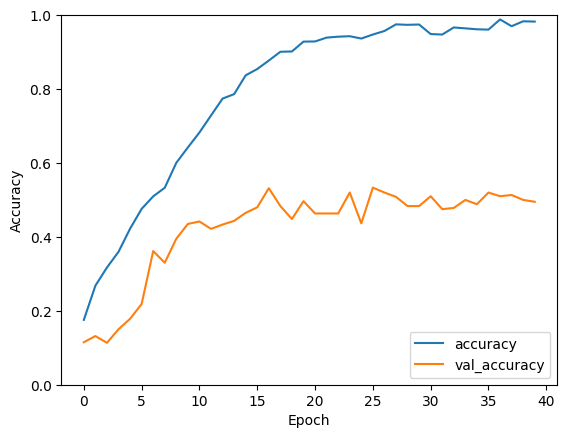

In [30]:
plt.plot(history4_64.history['accuracy'], label='accuracy')
plt.plot(history4_64.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [46]:
result4_64 = model4_64.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(result4_64["accuracy"]*100,2)}%')

32/32 [==============================] - 2s 41ms/step - loss: 2.9249 - accuracy: 0.5370
Dokładność modelu 53.7%


Batch 128 dla modelu4

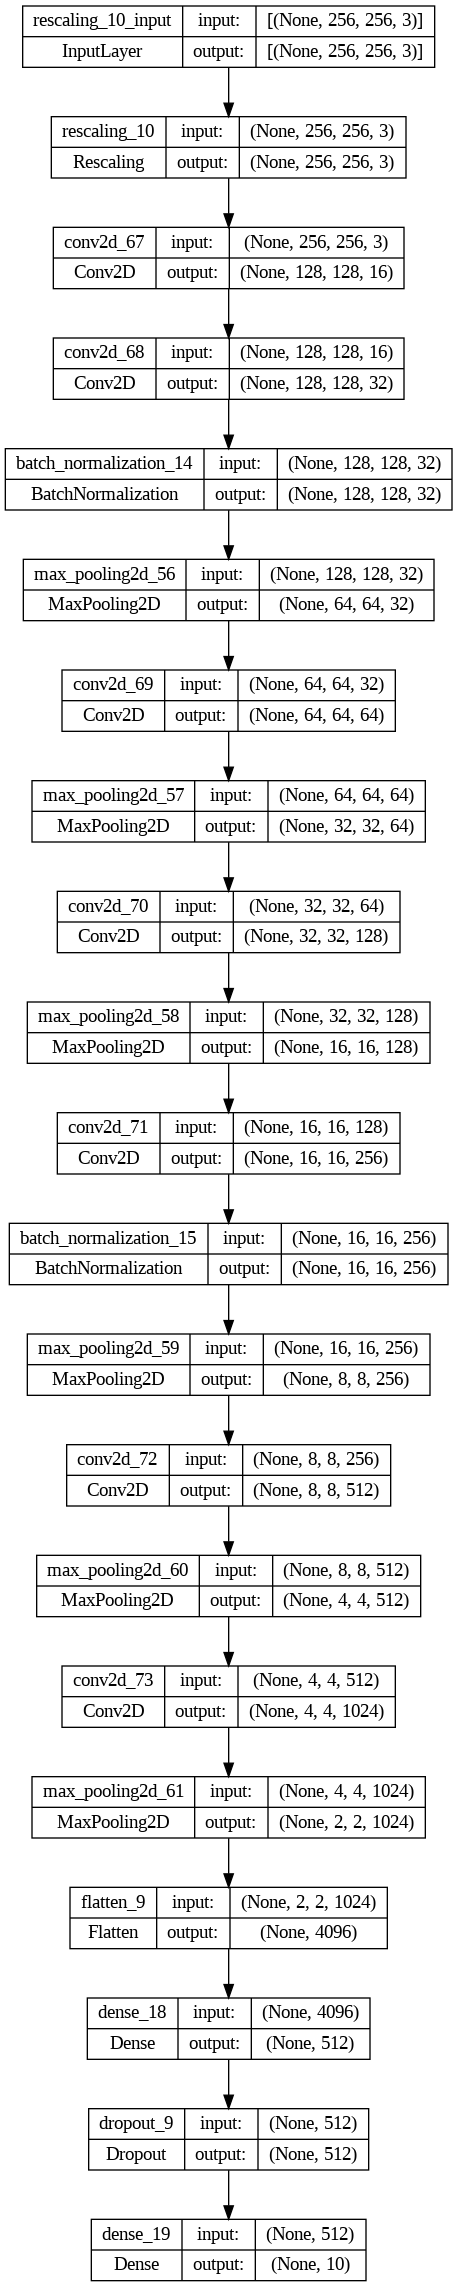

In [32]:
model4_128 = Sequential([
  layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, (2,2), strides=2, padding='same', activation="relu"),
  layers.Conv2D(32, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(64, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(128, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(256, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(512, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(1024, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(512, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(10, activation="softmax")
])
plot_model(model4_128, show_shapes=True)

In [33]:
# Kompilacja
model4_128.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
history4_128 = model4_128.fit(train_dataset, epochs=40, validation_data=valid_dataset,
                    batch_size=128)

Epoch 1/40
75/75 [==============================] - 11s 100ms/step - loss: 2.5618 - accuracy: 0.1717 - val_loss: 2.3079 - val_accuracy: 0.0950
Epoch 2/40
75/75 [==============================] - 5s 69ms/step - loss: 2.0113 - accuracy: 0.2675 - val_loss: 2.3217 - val_accuracy: 0.0950
Epoch 3/40
75/75 [==============================] - 8s 98ms/step - loss: 1.8597 - accuracy: 0.3492 - val_loss: 2.6792 - val_accuracy: 0.1167
Epoch 4/40
75/75 [==============================] - 8s 107ms/step - loss: 1.7406 - accuracy: 0.3879 - val_loss: 2.4932 - val_accuracy: 0.1167
Epoch 5/40
75/75 [==============================] - 7s 84ms/step - loss: 1.6026 - accuracy: 0.4346 - val_loss: 2.3118 - val_accuracy: 0.1350
Epoch 6/40
75/75 [==============================] - 8s 105ms/step - loss: 1.4906 - accuracy: 0.4717 - val_loss: 2.2169 - val_accuracy: 0.2317
Epoch 7/40
75/75 [==============================] - 6s 71ms/step - loss: 1.4123 - accuracy: 0.5088 - val_loss: 2.0914 - val_accuracy: 0.2767
Epoch 8/4

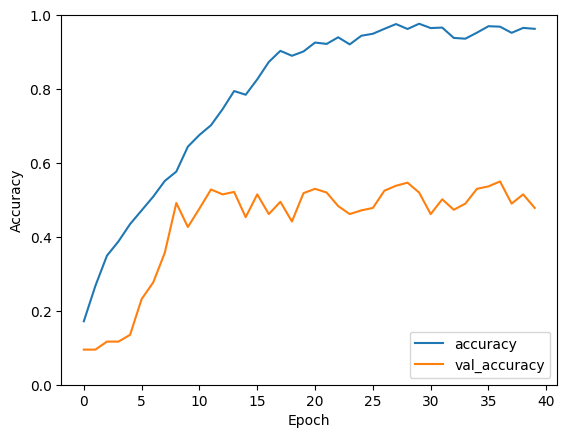

In [34]:
plt.plot(history4_128.history['accuracy'], label='accuracy')
plt.plot(history4_128.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [47]:
result4_128 = model4_128.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(result4_128["accuracy"]*100,2)}%')

32/32 [==============================] - 2s 40ms/step - loss: 3.7231 - accuracy: 0.5050
Dokładność modelu 50.5%


In [48]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, f1_score, precision_score, recall_score

# Funkcja do uzyskania prognoz modelu dla danego zestawu danych
def get_predictions(model, dataset):
    predictions = []
    labels = []
    for images, labels_batch in dataset:
        predictions_batch = model.predict(images)
        predictions.extend(np.argmax(predictions_batch, axis=1))
        labels.extend(np.argmax(labels_batch, axis=1))
    return np.array(predictions), np.array(labels)

In [56]:
predictions, labels = get_predictions(model4_64, test_dataset)
f1score = f1_score(labels, predictions, average='weighted')
print(f"Wynik F1: {f1score}")

1/1 [==============================] - 0s 22ms/step
Wynik F1: 0.5306813780088165


In [57]:
conf_matrix = confusion_matrix(labels, predictions)
print("Macierz konfuzji:")
print(conf_matrix)

Macierz konfuzji:
[[59  3 14  1  2  8  3  0  3  7]
 [ 0 53  0  6  2  4 12  8  2 13]
 [14  3 35  5  1 25  1  4  7  5]
 [ 0  4  1 71  1  4  5  5  1  8]
 [ 3  5  1  4 69  5  6  2  0  5]
 [ 6  4  8  4  0 58  4  3  4  9]
 [ 2 12  0  5  8  3 62  1  2  5]
 [ 6 37  5  5  2  8  5 19  2 11]
 [ 5  6 12  3  2  5  5  2 47 13]
 [ 2 13  2  4  2  5  5  1  2 64]]


In [58]:
bac = balanced_accuracy_score(labels, predictions)
print(f"Zbalansowana dokładność (BAC): {bac}")

Zbalansowana dokładność (BAC): 0.5369999999999999
